In [35]:
import jsonlines
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.font_manager import FontProperties
from party_lists.party_list import random_list
import numpy as np
from gerrytools.plotting import boxplot

In [1]:
# 8x5
plans = []
with jsonlines.open('../old_output/chains/massachusetts-0-40-0/neutral.jsonl') as r:
    for line in r:
        plans.append(line)

NameError: name 'jsonlines' is not defined

In [33]:
#gen list of shares and rep seats
shares = []
seats = []
for plan in plans:
    outcome = random_list(plan, 5) 
    for district in range(1, 9):
        share = plan['DIEHL18'][str(district)]/(plan['WARREN18'][str(district)] + plan['DIEHL18'][str(district)])
        shares.append(round(share, 2))
        cands, num_seats, party = outcome[district]
        if party == 'Democrat':
            seats.append(5-num_seats)
        if party == 'Republican':
            seats.append(num_seats)

Text(0, 0.5, 'Republican seats won per District')

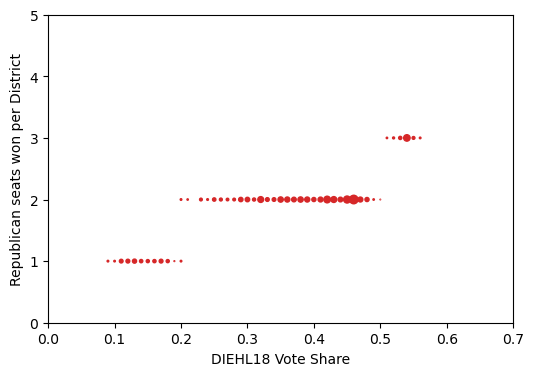

In [50]:
data = np.column_stack((shares, seats))
unique, counts = np.unique(data, axis=0, return_counts=True)
sizes = counts * .05
plt.figure(figsize=(6, 4))
plt.scatter(unique[:, 0], unique[:, 1], s=sizes, color = 'tab:red')
plt.ylim(0, 5)
plt.xlim(0, 0.7)
plt.xlabel('DIEHL18 Vote Share')
plt.ylabel('Republican seats won per District')

Switch axes...

Plots, more plots
8x5, 32x4, 10x4, 40x4 

100,000 Plans
- Warren/Dielh: SEN18D/R
- Baker(Republican): 2014/2018 GOV14/18/RD
- Markey/R: SEN20GEMAR/SEN20GKOCO
- Biden/Trump: PRES20GJBI/PRES20GDTR